# Sleep Disorder Detection Using Lifestyle Data

## 1. Importing Necessary Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('../dataset/data.csv')
data.shape

(374, 13)

In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
data.drop('Person ID', axis=1, inplace=True)

## 2. Data Preprocessing and EDA

### Handling Missing Data

In [5]:
data.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

Also, checking for irrelevant values in BMI Category column

In [7]:
data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [10]:
data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

In [12]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Univariate Analysis

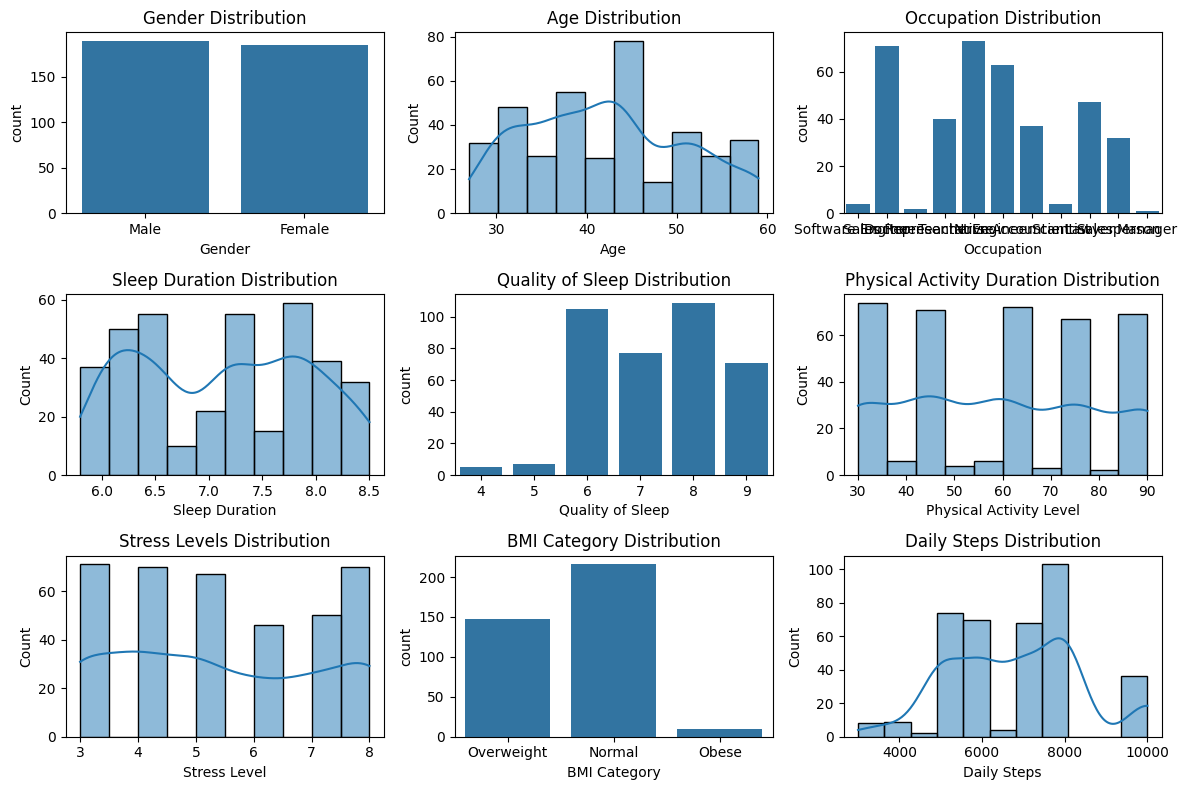

In [13]:
plt.figure(figsize=(12, 8))

# Gender
plt.subplot(3, 3, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

# Age
plt.subplot(3, 3, 2)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Occupation
plt.subplot(3, 3, 3)
sns.countplot(x='Occupation', data=data)
plt.title('Occupation Distribution')

# Sleep Duration
plt.subplot(3, 3, 4)
sns.histplot(data['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')

# Quality of Sleep
plt.subplot(3, 3, 5)
sns.countplot(x='Quality of Sleep', data=data)
plt.title('Quality of Sleep Distribution')

# Physical Activity Duration
plt.subplot(3, 3, 6)
sns.histplot(data['Physical Activity Level'], kde=True)
plt.title('Physical Activity Duration Distribution')

# Stress Levels
plt.subplot(3, 3, 7)
sns.histplot(data['Stress Level'], kde=True)
plt.title('Stress Levels Distribution')

# BMI Category
plt.subplot(3, 3, 8)
sns.countplot(x='BMI Category', data=data)
plt.title('BMI Category Distribution')

# Daily Steps
plt.subplot(3, 3, 9)
sns.histplot(data['Daily Steps'], kde=True)
plt.title('Daily Steps Distribution')

plt.tight_layout()
plt.show()

### Descriptive Analysis

In [14]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Observations from Univariate and Descriptive Analysis

* The data is evenly distributed between male and female.
* By performing a histplot, we got to know the Age Distribution. The data contains examples ranging from 27 years of age to a maximum of 59, the mean age being 42 and median age being 43.
* Sleep Duration Ditribution is fairly simple. An average sleep of 7 hours, which is ideal. With very few people getting sleep less than 6 hours, closer to 4-5 hours.
* Physical Acitivity Level shows the periodic trend of people working out for durations like 30 mins, 45 mins, 60 mins, 75 mins and 90 mins. With the average of working out for an hour.
* Stress Level shows an average of 5, ranging from the lowest of 3 to a highest of 8.
* Heart Rate and Daily Steps distribution seem pretty average, with the mean heart rate being 70 and the highest being 86, which is average for an adult and daily steps ranging from 3000 being the lowest and 10000 being the highest, with average of 6819 steps daily.

### Bivariate Analysis

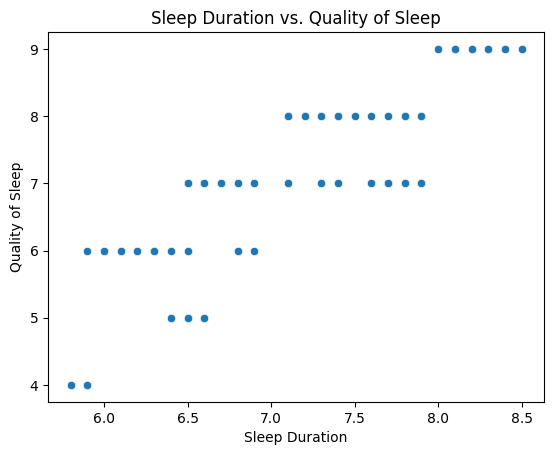

In [15]:
# Sleep Duration vs. Quality of Sleep:
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

To check how of duration of sleep affects quality sleep, I performed a scatterplot between duration and quality of sleep. We found out that people who slept less that average of 7.2 hours have less than average quality of sleep which is 7(subjective number defining quality of sleep on a scale of 10).

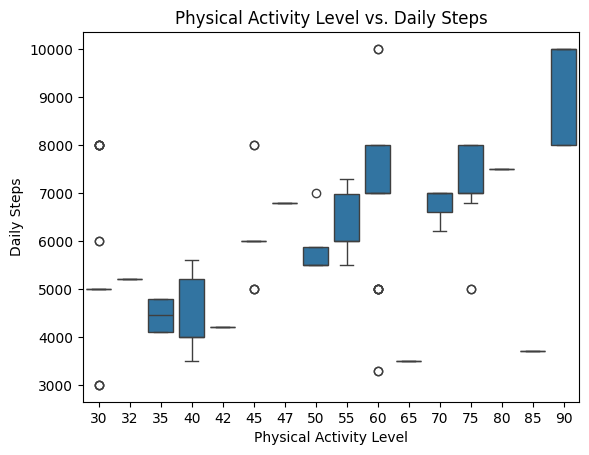

In [16]:
# Physical Activity Level vs. Daily Steps:
sns.boxplot(x='Physical Activity Level', y='Daily Steps', data=data)
plt.title('Physical Activity Level vs. Daily Steps')
plt.show()

To cross check the acitivity levels of individual w.r.t the number of daily steps they take I performed boxplot on Physical Activity Level, which is the duration of exercise the individual claimed they did(in minutes) vs the number of steps they walked daily. The overall observation is as expected, there is a linear increase in Physical Activity Level and Daily Steps taken. Also, there are some outliers that shows that sometimes people might be walking less than others with their acitivity level and doing weight training more or some people might be doing more cardio than weight training which means they might be walking more steps than others with their activity level.

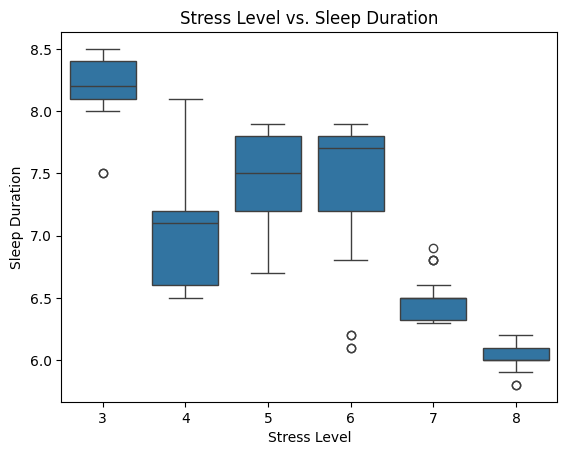

In [17]:
# Stress Level vs Sleep Duration
sns.boxplot(x='Stress Level', y='Sleep Duration', data=data)
plt.title('Stress Level vs. Sleep Duration')
plt.show()

Performing a boxplot between stress level and sleep duration to find any pattern between the two. The observation shows that their is a decrease in stress levels with increase in sleep duration. Sleep Duration and Stress Level has bi-directional relationship. Stress can affect sleep duration in a sense that there might be difficult sleeping thereby reducind quality of sleep as well. On the other hand, sleeping less can cause stress, because adequate sleep is necessary for emotional well-being and regulation. Lack of sleep can affect your coping mechansim as it can impair your cognitive functions. Ofcourse, there are some outliers as it can depend on person to person but there is a general pattern here which we are able to see here.

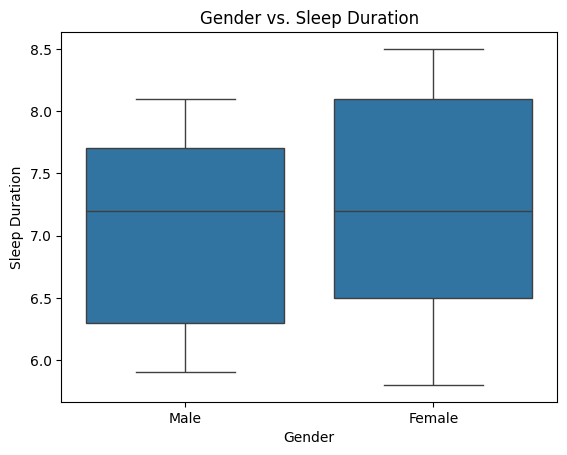

In [18]:
# Gender vs Sleep Duration
sns.boxplot(x='Gender', y='Sleep Duration', data=data)
plt.title('Gender vs. Sleep Duration')
plt.show()

After performing a boxplot between Sleep Duration and Gender we found that on an average even though there is no difference but women slightly tend to sleep for longer duration than men.

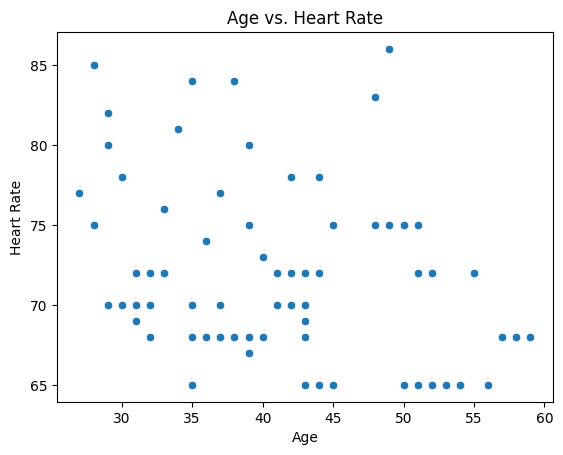

In [19]:
# Age vs Heart Rate:
sns.scatterplot(x='Age', y='Heart Rate', data=data)
plt.title('Age vs. Heart Rate')
plt.show()

The gradual decrease in heart rate w.r.t age which is known fact that MHR or mean heart rate decreases as a person ages.

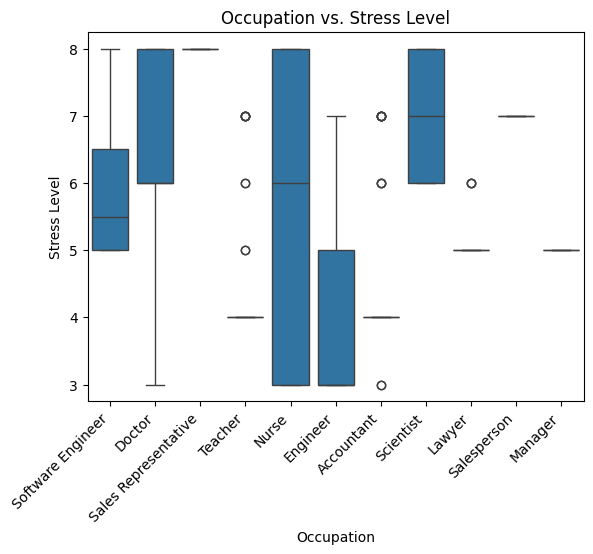

In [20]:
# Occupation vs Stress Level:
sns.boxplot(x='Occupation', y='Stress Level', data=data)
plt.title('Occupation vs. Stress Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

This showcases different stress level w.r.t jobs where stress can be pretty high for jobs like doctors and scientist while software engineers have average stress levels or less. Nurses having varied levels of stress, depending on maybe the types of wards they work in(eg. emergency, general, etc.)

# End of Notebook